<h1>Can Treasury Bond Yields Help Predict Real Gdp?</h1>


<h1>Introduction:</h1>


<p>
Recently, it was reported in the media that treasury bond yield curve partially inverted when the yield of 10Y treasury notes briefly dipped below yields of 3 month treasury bonds. According to these media reports, this dip portends economic recession in the near future. Is there any truth to these fears? If we visually inspect, the correspondents between bond yield inversions and recessions by graphing 10Y treasury bond yields minus 2Y treasury bond yields (T10Y2Y) with periods of recession indicated by superimposed bars, there seems to be a correspondence between inversions, i.e. when the graph dips below zero, and the start of a recession. However, considering that there are only five examples of recession within the time period represented by T10Y2Y time series how can we be certain that the relationship is real and not a random anomaly? Honestly, I am not certain how to evaluate this relationship directly. Instead, this post will tackle a different albeit related topic, which is the relationship if any between treasury bond yields and real gdp. If treasury bond yield inversions really are a leading indicator of recession, we might expect to find a more general relationship between bond yields and real gdp. 
</p>
<p>
In this demonstration, I will compare <a href="https://fred.stlouisfed.org/series/DGS2">2-Year Treasury Constant Maturity Rate</a> (DGS2) with <a href="https://fred.stlouisfed.org/series/GDPC1">Real Gross Domestic Product</a> (GDPC1).
</p>


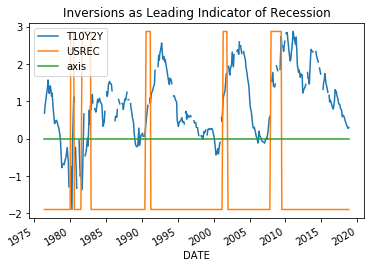

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read 10Y minus 2Y to df: T10Y2Y

T10Y2Y = pd.read_csv("../input/T10Y2Y.csv", index_col = 0, parse_dates = True, skip_blank_lines = True, dtype= {'T10Y2Y': np.float64}, na_values ='.')

#read USREC  to df: USREC
USREC = pd.read_csv("../input/USREC.csv", index_col = 0, parse_dates = True, skip_blank_lines = True, dtype= {'USREC': np.float64}, na_values ='.')

#Inner join T10Y2Y, USREC: merged
merged = T10Y2Y.join(USREC, how = 'inner')
merged.USREC =((merged.USREC)*(np.max(merged.T10Y2Y)-np.min(merged.T10Y2Y))+np.min(merged.T10Y2Y))

#creates axis at y=0
merged['axis'] = pd.Series([0 for x in range(len(merged.index))], index=merged.index)

#plot USREC and 10TY2Y
merged.T10Y2Y.plot(y='2Y Treasury Yields', title = 'Inversions as Leading Indicator of Recession', legend = True)
merged.USREC.plot(kind ='line', y= 'Recessions', legend = True)
merged.axis.plot(kind='line')
plt.legend()
plt.show()


<h1>Data Pre-Processing:</h1>


<h2>Is the Data Stationary?</h2>


<p>
The first step is to plot the data to get a sense of things. On first glance, it is apparent that a negative correlation exists between the datasets, since the GDPC1 has generally been growing since inception, while the DGS2 has generally been decreasing. I guess we are done here, and can conclude that as real gdp grows 2Y bond yields tend to drop. Not so fast! What if the observed correlation is just incidental. Lots of things grow and shrink. The fact that the growing and shrinking happened to occur over the same time period might be incidental and not evidence of a real relationship. The idea that two datasets can be correlated without being related is known as <em>spurious correlation</em> and is an important concept in time-series analysis. 
</p>
<p>
The reason why time-series are particularly prone to spurious correlations is because values in time-series tend to be correlated with one or more previous values of the same time-series. In other words, the assumption that the values of the time-series are independent and identically distributed (i.i.d) within the time-series, an assumption made when analyzing other types of data, cannot be made when analyzing time-series. The fact that values in time-series are not i.i.d causes time series to exhibit time dependent trends, which in turn leads to spurious correlations and faulty conclusions. Therefore, in order to make meaningful conclusions from time-series data we need to represent the data in such a way as to minimize time dependent trends caused by the ‘non-iid-ness’ of time-series data. 
</p>
<p>
One way to think about this is to visualize data being produced by a process in a factory. If the process is changing over time our product is going to be shoddy and unpredictable. Ideally, the process is constant over time and differences between subsequent values in the data are due to randomness rather than changes in the underlying process producing the data. A process which is constant over time is called a <em>stationary process</em>. <em><a href="https://people.duke.edu/~rnau/411diff.htm">Stationary</a></em> data is data produced by a stationary process whose statistical properties (e.g. mean and standard deviation) are constant over time. Think noise having constant mean and standard deviation. 
</p>

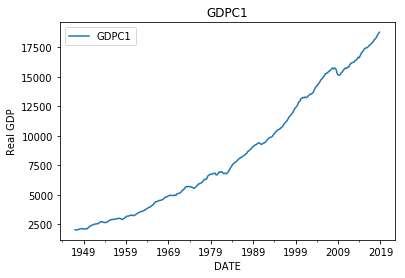

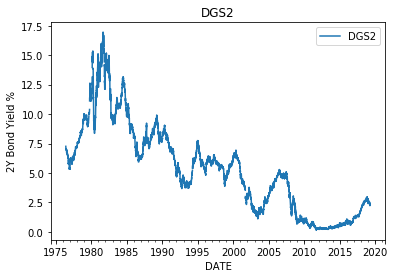

In [2]:
#read real gdp (GDPC1) to df: gdp
gdp = pd.read_csv("../input/GDPC1.csv", index_col = 0, parse_dates = True, skip_blank_lines = True, dtype= {'GDPC1': np.float64}, na_values ='.')
#read 2Y treasury yields (DGS2) to df: Two
Two = pd.read_csv("../input/DGS2.csv", index_col = 0, parse_dates = True, skip_blank_lines = True, dtype= {'DGS2': np.float64}, na_values ='.')

#plot gdp
gdp.plot()
plt.ylabel('Real GDP')
plt.title(label = 'GDPC1')
plt.show()

#plot DGS2
Two.plot()
plt.ylabel('2Y Bond Yield %')
plt.title(label = 'DGS2')
plt.show()

<h2>Differencing vs. Detrending</h2>


<p>
It is clear from first glance that our data is not stationary, since the mean values of the data tend to grow or shrink with time. The real gdp in 1950s is less than that of the 1990s. Similarly 2Y bond yields in the 1980s were much higher than they were in the 2000s. Clearly the means of these time series are changing with time and therefore not stationary. So how do we represent the data in a manner which is stationary? Well truthfully, perfect stationary is more of an ideal to strive than a reality. In reality, even after processing, the data might still exhibit some time dependent characteristics. That said, there are two main approaches for stationarizing data: differencing and detrending. In the first approach, we difference values of the time series from previous values of a predefined lag. The idea being that even if the original data is not stationary, the period-to-period differences of the data might be stationary. In the second approach we fit a deterministic trend to and subtract it from data leaving the residuals around the trend. The idea being that even if a time-series exhibits a strong deterministic trend, that the residual errors around the trend might be stationary. For instance, we could fit a high order polynomial to GDPC1 and then subtract it from GDPC1, leaving the residuals around the trend which might be closer to stationary than the original GDPC1 values. 
</p>
<p>
Here we will stationarize the data using the differencing technique. For the GDPC1 we stationarize the time series by calculating the percent change from quarter to quarter, which is equivalent to the quarterly growth rate of real gdp. This is a slight variant of the differencing technique in which we divide the difference by the lag value to get a percent change rather than the raw difference. For the DGS2, we convert the time-series from daily to quarterly through aggregating by mean and taking the first difference of the data. This is simply the difference in the quarterly average of 2Y yields. Finally we plot the stationarized data. Upon inspecting the plots, we notice that the the datasets are more stable over time with no obvious seasonal or deterministic trends. One concern, however, is that the variances of datasets seem to change with time.
</p>


/opt/conda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


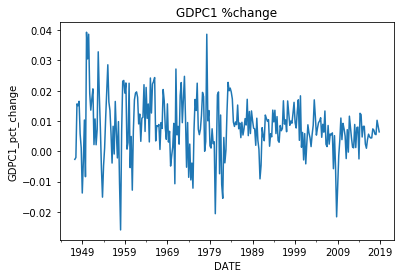

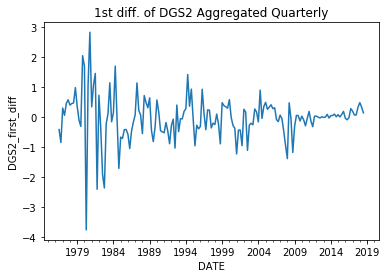

In [3]:

#calculate percent change between quarters of GDPC1
gdp['GDPC1_pct_change'] = gdp['GDPC1'].pct_change()

#create empty numpy array to recieve quarterly means for 2Y treasury yields
mean_two = np.empty(len(gdp))

#convert 2Y treasury yields from daily values to quarterly values
for i in range(len(gdp)-1):
    #for each quarter in gdp return the mean value of the 2Y treasury yields 
    mask = ((Two.index > gdp.index[i]) & (Two.index <= gdp.index[i+1]))
    mean_two[i]  = np.nanmedian(Two.DGS2[mask])
    

features = pd.DataFrame({'DGS2':mean_two}, index = gdp.index)
    
#take first difference of treasury yields

features['DGS2_first_diff']= features['DGS2'].diff()
features = features[:-1]

#plot gdp
gdp['GDPC1_pct_change'].plot()
plt.ylabel('GDPC1_pct_change')
plt.title(label = 'GDPC1 %change')
plt.show()

#plot DGS2
features['DGS2_first_diff'].plot()
plt.ylabel('DGS2_first_diff')
plt.title('1st diff. of DGS2 Aggregated Quarterly')
plt.show()

<h2>ADF and KPSS Tests</h2>


<p>
Aside from visual inspection we can also test stationarity with statistical tests, such as the augmented dickie-fuller test (adf) and the Kwiatkowski-Phillips-Schmidt-Shin test (kpss).  In the adf test the null hypothesis is that the process is not stationary and the alternative hypothesis is that the data is either stationary or difference stationary. In the kpss test the null hypothesis is that the process is either trend-stationary or stationary and the alternative hypothesis is that the process is not stationary. Here difference stationary means that the data would be strictly stationary if another difference was taken and trend stationary means that the data would be strictly stationary if a deterministic trend was removed from the data. The results of these tests guide us on how to proceed according to the following scenarios:
</p>
<p>
#1) If both tests conclude that the data is stationary then we conclude the data is stationary.
</p>
<p>
#2) If both tests conclude that the data is not stationary then we conclude that the data is not stationary.
</p>
<p>
#3) If ADF concludes that data is difference stationary or stationary, and KPSS concludes that the data is not stationary, then we conclude that the data is difference stationary and would be strictly stationary if a difference was taken.
</p>
<p>
#4) If KPSS concludes that the data is trend stationary or stationary, and ADF concludes that the data is stationary, then we conclude that the data would be strictly stationary if a deterministic trend were removed. 
</p>
<p>
Upon inspecting the results of each test on both time-series, we see that the results for GDPC1 follows scenario #3 in that adf test rejects the null hypothesis that the time-series is not stationary in favor of the alternative hypothesis that the series is either stationary or difference stationary, while kpss rejects the null hypothesis that the series is trend stationary or stationary in favor of the alternative that the time-series is not stationary. Therefore, we proceed by taking a second difference on both time-series.
</p>

In [4]:
#imports
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#test GDPC1 for non-stationary trends using augmented dickie fuller test
X = gdp.GDPC1_pct_change.dropna().values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
	print('\t%s: %.3f' % (key, value))

#test DGS2 for non-stationary trends using augmented dickie fuller test
X = features.DGS2_first_diff.dropna().values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.415261
p-value: 0.000000
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
KPSS Statistic: 0.469446
p-value: 0.048548
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
ADF Statistic: -5.921202
p-value: 0.000000
Critical Values:
	1%: -3.471
	5%: -2.880
	10%: -2.576
KPSS Statistic: 0.079204
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


<h2>ADF and KPSS Tests, Round 2:</h2>


<p>
If we rerun the tests, the results favor stationarity. We are now comparing the difference in percent change of real gdp measured quarterly to the second difference of the quarterly mean of 2Y yields. Admittedly, not the most straightforward comparison, however remember the benefits of stationarity. Now that the data is stationary, it much less likely that we will find false relationships based on spurious correlations. Further, stationarity improves predictions since it is easier to predict processes that are constant versus those that are changing with time. So even if it is hard to understand what the data means at this point, by enforcing stationarity we make our lives easier down the road. 
</p>

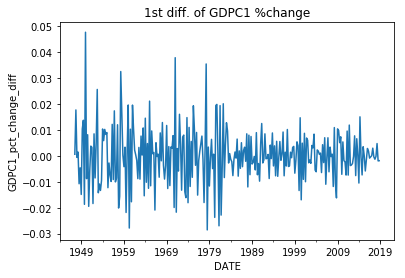

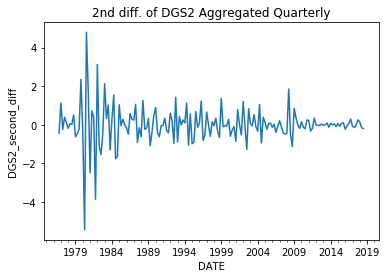

ADF Statistic: -7.760965
p-value: 0.000000
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
KPSS Statistic: 0.046217
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [5]:
#Take a second difference of both time-series
gdp['GDPC1_pct_change_diff']=gdp['GDPC1_pct_change'].diff()
features['DGS2_second_diff'] = features['DGS2_first_diff'].diff()

#plot gdp
gdp.GDPC1_pct_change_diff.plot()
plt.ylabel('GDPC1_pct_change_diff')
plt.title(label= '1st diff. of GDPC1 %change')
plt.show()

#plot DGS2
features.DGS2_second_diff.plot()
plt.ylabel('DGS2_second_diff')
plt.title(label ='2nd diff. of DGS2 Aggregated Quarterly')
plt.show()

#test GDPC1 for non-stationary trends using augmented dickie fuller test
X = gdp.GDPC1_pct_change_diff.dropna().values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
	print('\t%s: %.3f' % (key, value))




<h2>Plot the Correlation</h2>


<p>
Finally, the moment of truth. Let’s plot the stationarized GDPC1 data vs. the  stationarized  DGS2 data to determine if a correlation exists. First we concatenate <code>gdp</code> (df containing GDPC1) with <code>features</code> (df that contains DGS2). This just stacks the two data-frames horizontally with each other which is possible since they both share the same datetime indexes. Then we drop any row with nan values to get rid of rows with no DGS2 values. Let’s also get rid of data after 2009 since federal monetary policy flatlined interest rates to near zero following the 2008 financial crisis, which had an undue effect on DGS2 values over this time period. Finally we plot a trend-line and calculate pearson r and r-squared values. The plot below indicates a weak correlation between the two time series with an r-value of.3948 and an r-squared value of .1559. An r-squared value of .1559 indicates that linear model explains 15.59% of the variance of the dependent variable. 
</p>

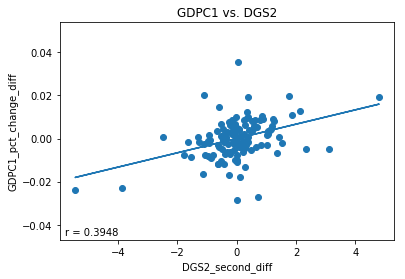

r-squared : 0.15591264219051582


In [6]:
#imports
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

column = 'GDPC1_pct_change_diff'
column1 = 'DGS2_second_diff'

#merge gdp with features, drop rows with nans
merged = pd.concat([gdp[column], features[column1].loc[:'2009']], axis =1).dropna()

#fit linear model to data
model = LinearRegression()
X = merged[column1].values.reshape(-1,1)
y = merged[column].values.reshape(-1,1)
model.fit(X, y)

#calculate trend line and correlation coefficient
trend = model.predict(X)
r= pearsonr(X, y)[0][0]

#create scatter plot of GDP and DGS2
plt.scatter(X, y)
plt.plot(X, trend)
plt.xlabel(column1)
plt.ylabel(column)
plt.annotate(s= 'r = '+ str(r)[0:6], xy = [5,5], xycoords = 'axes points')
plt.title('GDPC1 vs. DGS2')
plt.show()
print('r-squared : {}'.format(model.score(X,y)))

<h2>Is it Possible that the Observed Relationship is Spurious?</h2>


<p>
One might think, that we can answer this question by simply calculating a 95% confidence interval for the slope of the trendline to determine if it incorporates zero. However, I don’t think that this would answer the question. Calculating a confidence interval implicitly assumes that the data is i.i.d, whereas our data probably isn’t completely. Going back to the concept of spurious correlation, two time series might appear to be closely correlated when in fact not at all, due underlying trends in the data. Simply calculating a confidence interval wouldn’t give us a sense of how likely it is that the observed correlation is spurious. We’ve done our best to remove trends from the data and enforce stationarity, however, is there a chance that the observed correlation can still be spurious despite our best efforts? 
</p>
<p>
Generally speaking, the reasons why time-series contain trends in the first place is because the observations of a time-series are not completely independent of each other. For instance, observations in a time-series tend to be correlated with one or more lagged observations of the same time-series. The degree to which a time-series show correlation when regressed against lags of itself can be considered the ‘autoregressive’ properties of the time-series and using an autoregressive (AR) model we can simulate data having similar autoregressive properties to those observed in our original data. Therefore, one way to approach this question is to estimate the probability of observing a more extreme correlation than that observed given data having similar autoregressive properties to our data. We can do this by using an AR model to simulate data with similar AR properties to our original data and iteratively calculating correlations between the simulated data. The p-value is the probability of observing a correlation between the simulated data which is more extreme than the correlation observed between the actual data. The proposed steps are as follows: 1) fit AR models to our data, 2) Use the AR models to iteratively and randomly simulate data having similar AR properties to our data, and 3) calculate the probability of observing a more extreme correlation to that actually observed. 
</p>
<h2>Determining Optimum Parameters for the AR models</h2>


<p>
Before we can fit the AR models to the data, we must first determine the optimum order for the AR models. The order of the AR model represents the number of lags that the model uses. Optimally, we determine the order that optimizes information provided to the model while minimizing the number of lags used. One way to do this is using autocorrelation and partial autocorrelation plots. Here we will use the Bayesian Information Criterion (BIC). I’ll be honest, I don’t know how the BIC is calculated, however I know how it’s used. We’ll consider the optimum model the one that minimizes the BIC. For each of time-series we iterate through AR models fitted using orders 1-9. For each order, we capture the BIC and save it in an array. We then plot the BIC for each order and select the order that minimizes the BIC. As can be seen from the plots below, the optimum orders for both time-series are two. Therefore, our AR models will consider up to two lags when fitting the data.
</p>

/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

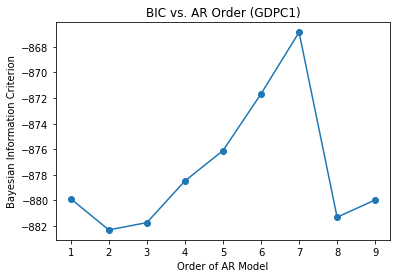

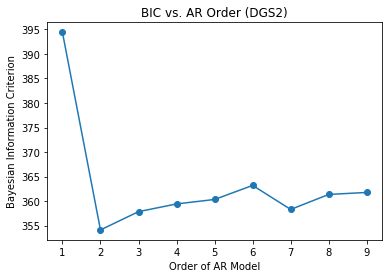

In [7]:
from statsmodels.tsa.arima_model import ARMA
column = 'GDPC1_pct_change_diff'
column1 = 'DGS2_second_diff'
X=merged[column].resample('Q').mean().dropna()

#Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(10)
for p in range(10):
    mod = ARMA(X, order=(p,0), freq = 'Q')
    res = mod.fit()
    
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,10), BIC[1:10], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.title(label = 'BIC vs. AR Order (GDPC1)')
plt.show()

X=merged[column1].resample('Q').mean().dropna()

#Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(10)
for p in range(10):
    mod = ARMA(X, order=(p,0),freq = 'Q')
    res = mod.fit()
    
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,10), BIC[1:10], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.title(label = 'BIC vs. AR Order (DGS2)')
plt.show()

<h2>Calculating P-Values Based on Simulated Data</h2>


<p>
Now that we have determined the optimum orders for our AR models we can fit the data to the models and simulate data with similar autoregressive properties to the data. In the code below, <code>AR_object</code> simulates data similar the first difference in percent change of real gdp measured quarterly, while <code>AR_object1</code> simulates data similar to the second difference of the quarterly mean of 2Y yields. Using <code>AR_object</code> and <code>AR_object1</code> we iteratively simulate data having the same length as our data and calculate three r-squared values. The first is the correlation between the two simulated series, the second is between the simulated GDPC1 data and the actual DGS2 data and the third is between the simulated DGS2 data and the actual GDPC1 data. We capture and save these r-squared values in respective numpy arrays. This is repeated 1000 times. Finally we calculate three p-values using the three r-squared values. Theoretically, these p-values should be very similar. The p-values are the fraction of simulated r-squared values that were greater than the observed r-squared value of .1559. As can be seen from the printed output below very few of the simulated r-squared values were greater than the observed r-squared value. Since our simulated p-values are much less than .05 we can be confident that the observed relationship is real and not spurious. Formally, we can reject the null hypothesis that the observed relationship is spurious in favor of the alternative hypothesis that relationship is real. 
</p>

In [8]:
from statsmodels.tsa.arima_process import ArmaProcess

#create ARMA models
X=merged[column].dropna().resample('Q').mean()
X1=merged[column1].dropna().resample('Q').mean()
mod = ARMA(X, order = (2,0))
results =mod.fit()
mod = ARMA(X1, order = (2,0))
results1 =mod.fit()

#create ARMA process objects for simulating data
AR_object = ArmaProcess().from_estimation(results)
AR_object1 = ArmaProcess().from_estimation(results1)

#create empty arrays for storing r-squared values
rs =np.empty(1000)
rg = np.empty(1000)
rt= np.empty(1000)

#simulate 1000 series with similar autoregressive properties to actual data
for i in range(1000):
    
    simulated_data = AR_object.generate_sample(nsample= len(merged))
    simulated_data1 = AR_object1.generate_sample(nsample= len(merged))
    r=pearsonr(simulated_data, simulated_data1)[0]
    rs[i] = r**2

    r =pearsonr(X, simulated_data1)[0]
    rg[i] = r**2
    
    r =pearsonr(X1, simulated_data)[0]
    rt[i] = r**2
    
#calculate p-values for r-squared values greater than observed value    
p = np.sum(rs >=.3948**2)/len(rs)
pg = np.sum(rg >=.3948**2)/len(rg)
pt = np.sum(rt >=.3948**2)/len(rt)
print('p-value of simulated data series having higher correlation than observed: {}'.format(str(p)))
print('p-value of simulated gdp vs real DGS2 havign higher correlation than observed: {}'.format(str(pg)))
print('p-value of simulated DGS2 vs real GDPC1 having higher correlation than observed: {}'.format(str(pt)))

/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

p-value of simulated data series having higher correlation than observed: 0.0
p-value of simulated gdp vs real DGS2 havign higher correlation than observed: 0.0
p-value of simulated DGS2 vs real GDPC1 having higher correlation than observed: 0.0


<h2>Predicting Change in Quarterly Growth Rate</h2>


<p>
Before, we try and predict the quarterly growth rate of real gdp, let’s see if we can use the second difference of 2Y yields to predict <em>differences</em> in the quarterly growth rate. If we can reasonably predict differences in the quarterly growth rate, then we can sum these differences with lagged values of the quarterly growth rate to predict current values of quarterly growth rate.
</p>
<p>
Here we train a linear model to predict differences in quarterly growth rate. The basic steps are to split the data into several subsets each consisting of training data and test data. For each subset, we the train the model using the training data and then evaluate the model on how well it predicts the test data. For a model to be valid, it must demonstrate an ability to predict unseen test data. One special consideration when dealing with time-series data is that unlike other forms of data, order matters. Therefore when we split the data we must ensure that the test data is always later in the timeseries than the training data. We accomplish this using sklearn’s <code>TimeSeriesSplit</code>, a  cross-validator which is designed for time-series data. <code>TimeSeriesSplit</code> splits the data in such a way that test data is always later than training data.Here we use <code>TimeSeriesSplit</code> to create five splits of training and test data. For each split of data we train a linear model using the training data and predict the test data. 
</p>
<p>
To evaluate how the model performs, we create three plots. The first plot shows how <code>TimeSeriesSplit</code> splits the data into training and test data during each iteration. This plot checks to make sure that the model always validates using test data (blue) that is later in the time-series than the training data (red). The second plot shows our predictions (red) plotted concurrently with the values being predicted (purple) plotted against time. The second plot demonstrates an apparent correspondence between predicted values and actual values. The third plot shows actual values plotted against predicted values, color coded according to split period. To evaluate the performance of the model, we also fit  a trend-line to the data and calculate the correlation coefficient r. The third plot demonstrates that on the whole our predicted values are weakly correlated (r=.4129) with actual values. If we look at individual periods however, we see that not all periods did so well. For instance, there doesn’t seem to be much of a correlation between predicted values and actual values in period 3. This is corroborated by printing the correlation coefficients for each period individually. We see that periods 0,1,2 and 4 had correlation coefficients of between .49 and .58, whereas period 3 had a r-value of only .09. On the whole, however, we can conclude that the second difference of of 2Y yields averaged quarterly has some validity in predicting differences in the quarterly growth rate of real gdp. 
</p>

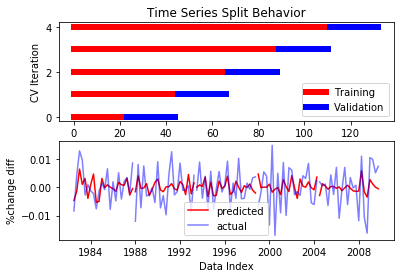

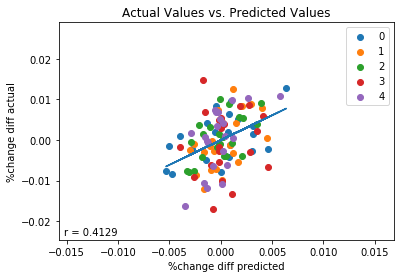

r of 0: 0.4965677400193795
r of 1: 0.5382686478071248
r of 2: 0.5696616507526244
r of 3: 0.09656420696185615
r of 4: 0.5813568122601247


In [9]:

#import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit


#save column names for use as y, X: column, column 1
column = 'GDPC1_pct_change_diff'
column1 = 'DGS2_second_diff'


#merge features with gdp: merged
merged = pd.concat([gdp, features.loc[:'2009']], axis =1).dropna()

#instantiate linear model: est
est = LinearRegression()

#instantiate TimeSeriesSplit cross validator with 5 splits: cv
n_splits=5
cv= TimeSeriesSplit(n_splits)

#define X and y 
y = merged[column]
X= merged[column1]

# instantiate numpy arrays to store actual and predicted ys, pearsonr for each split
ys =[]
preds =[]

rs = []
p1=plt.subplot(2,1,1)
p2 =plt.subplot(212)

#iterate through each data split, i is iterateion number, tr are indexes for training data, tst are indexes for test data
for i, (tr,tst) in enumerate(cv.split(X,y)):
    
    #plot timeseries split behavior
    
    p1.plot(tr,np.full(shape = len(tr), fill_value = i),lw=6, c= 'red')
    p1.plot(tst,np.full(shape = len(tst), fill_value = i),lw=6, c = 'blue')
    
    
    #fit Linear Regression model    
    est.fit(X.iloc[tr].values.reshape(-1,1), y.iloc[tr].values.reshape(-1,1))
    
    #predict unseen test data for first difference of %change
    y_pred = est.predict(X.iloc[tst].values.reshape(-1,1))
    
    #append pearson r on period to rs
    rs.append(pearsonr(y_pred.squeeze(), y.iloc[tst])[0]) 
    
    
    #append actual ys and predicted ys to ys, preds
    ys.append(y.iloc[tst])
    preds.append(y_pred)
    
    #plot predicted GDPC1 %change first difference vs. actual %change first difference
  
    p2.plot(X.index[tst], y_pred, c = 'red')
    p2.plot(X.index[tst], y.iloc[tst], c= 'blue', alpha=.5)
    
    
        
#labels and legends for first and second subplots
p1.set(xlabel ='Data Index')
p1.set(ylabel = 'CV Iteration')
p1.set(title = 'Time Series Split Behavior')
p2.set(ylabel = '%change diff')
p1.legend(labels =['Training', 'Validation'])
p2.legend(labels = ['predicted', 'actual'])
plt.xlabel('Data Index')
plt.show()

#reshape data to be fit for trend line, 
for i in range(n_splits):
    plt.scatter(preds[i], ys[i], label =i)    
preds= np.squeeze(preds)
ps =preds[0]
ac=ys[0]
for i in range(1,n_splits):
    ps = np.hstack((ps,preds[i]))
    ac= np.hstack((ac,ys[i]))     
preds =ps
ys =ac

#fit trend line to predicted vs. actual 
model = LinearRegression()
model.fit(X=preds.reshape(-1,1), y=ys.reshape(-1,1))
trend = model.predict(preds.reshape(-1,1))

#calculate pearson r value for predictions vs. actual
r= pearsonr(preds.reshape(-1,1), ys.reshape(-1,1))[0][0]

#set labels,legend
plt.xlabel(xlabel= '%change diff predicted')
plt.ylabel(ylabel = '%change diff actual')
plt.legend()

#plot trend line
plt.plot(preds.reshape(-1,1), trend)

#annotate plot with pearson r value
plt.annotate(s= 'r = '+ str(r)[0:6], xy = [5,5], xycoords = 'axes points')
plt.title(label ='Actual Values vs. Predicted Values')

#show plot
plt.show()

#print pearson r for each period individually
for i in range(len(rs)):
    print('r of '+str(i)+": {}".format(str(rs[i])))


<h2> Predicting Quarterly Growth of Real GDP</h2>


<p>
Now that we have demonstrated an ability to predict <em>differences </em> in quarterly growth rates, let’s use these <em>differences</em> to predict quarterly growth rates. As before, we train the model to predict <em>differences</em>, however this time we sum these difference predictions with <em>previous</em> values of quarterly growth rates to estimate <em>current </em>values of quarterly growth rates.
</p>
<p>
We plot four plots. The first plot shows how the <code>TimeSeriesSplit</code> splits the data into training data and test data for each iteration and is identical to that shown previously. The second plot concurrently plots predicted values for quarterly growth rate (red) and actual values of quarterly growth rate (purple) against time. The third plot is a scatter plot which plots predicted values against actual values, color coded according to split period, to to determine if a correlation exists between predicted values and actual values. The higher this correlation, the better the model predicts the data. The fourth plot is a scatter plot which plots current quarterly growth rates vs. previous quarterly growth rates. This plot acts as a control. In order to demonstrate that 2Y yields provide added predictive power to our model, the correlation of the third plot must be higher than that of the fourth plot, otherwise 2Y yield data provides no added benefit over using lagged values of quarterly growth rates alone.
</p>
<p>
Upon running the code, we inspect the plots. Plots two and three demonstrate a moderate correlation of .59 between predicted values of quarterly growth rates and actual values of quarterly growth rates. An r-squared value of .35 indicates that the model accounts for 35% of the observed variance of the data. As before, the model’s performance varies by period, as indicated by the varying r-values of individual periods. The best performing period was period 0 with an r-value of .75, the worst performing period was period 3 with an r-value of .18. Despite period 3, however, on the whole the model performs <em>moderately</em> well. 
</p>
<p>
Plot four demonstrates that autocorrelation cannot fully explain the success of the model. For instance, if we simply guessed a current quarterly growth rate based on the value of the previous quarterly growth rate, the correlation between predicted and actual values would be .37 as indicated by plot four. However, by adding the model’s estimates of <em>differences</em> to the previous values of quarterly growth rate we increased this correlation from .37 to .59, .22 above what would be expected otherwise. Therefore, we conclude that some of the predictive power the model is derived from economic information encoded by 2Y treasury yields. 
</p>

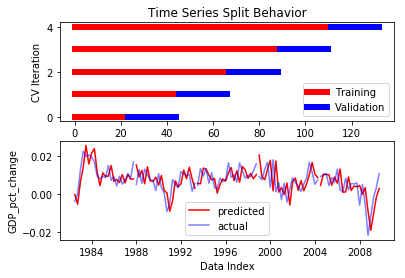

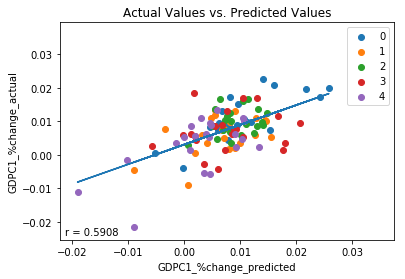

r of 0: 0.750545624866935
r of 1: 0.4803355820745575
r of 2: 0.27530522624068526
r of 3: 0.17660655951362475
r of 4: 0.629367121240325


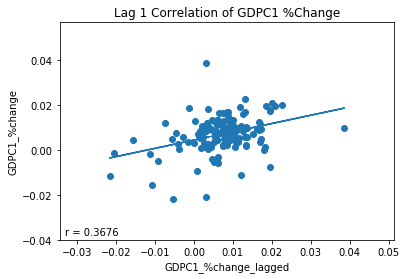

In [10]:
#import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit


#create new column with percent change lags
gdp['GDPC1_pct_change_lagged'] = gdp['GDPC1_pct_change'].shift()


#save column names for use as y, X: column, column 1
column = 'GDPC1_pct_change_diff'
column1 = 'DGS2_second_diff'


#merge features with gdp: merged
merged = pd.concat([gdp, features.loc[:'2009']], axis =1).dropna()

#instantiate linear model: est
est = LinearRegression()

#instantiate TimeSeriesSplit cross validator with 5 splits: cv
n_splits=5
cv= TimeSeriesSplit(n_splits)

#define X and y 
y = merged[column]
X= merged[column1]

# instantiate numpy arrays to store actual and predicted ys for each split
y1s=[]
preds1=[]

rs = []

p1=plt.subplot(2,1,1)
p2 =plt.subplot(212)

#iterate through each data split, i is iterateion number, tr are indexes for training data, tst are indexes for test data
for i, (tr,tst) in enumerate(cv.split(X,y)):
    
    #plot timeseries split behavior
    
    p1.plot(tr,np.full(shape = len(tr), fill_value = i),lw=6, c= 'red')
    p1.plot(tst,np.full(shape = len(tst), fill_value = i),lw=6, c = 'blue')
    
    #fit Linear Regression model    
    est.fit(X.iloc[tr].values.reshape(-1,1), y.iloc[tr].values.reshape(-1,1))
    
    #predict unseen test data for first difference of %change
    y_pred = est.predict(X.iloc[tst].values.reshape(-1,1))
    
    #Use lagged %change and predictions for difference of %change to predict current %change
    y_pred1 = y_pred + merged.GDPC1_pct_change_lagged.iloc[tst].values.reshape(-1,1)
    
    #append actual ys and predicted ys to y1s, and preds1
    
    preds1.append(y_pred1)
    y1s.append(merged.GDPC1_pct_change.iloc[tst])
    
    #append pearson r on period to rs
    rs.append(pearsonr(y_pred1.squeeze(), merged.GDPC1_pct_change.iloc[tst])[0]) 
    
    
    
    #plot predicted GDPC1 %change vs. actual GDPC1 %change
    
    p2.plot(X.index[tst], y_pred1, c = 'red')
    p2.plot(X.index[tst], merged.GDPC1_pct_change.iloc[tst], c= 'blue', alpha=.5)
        
#labels and legends for first and second subplots
p1.set(xlabel ='Data Index')
p1.set(ylabel = 'CV Iteration')
p1.set(title='Time Series Split Behavior')
p2.set(ylabel = 'GDP_pct_change')
p1.legend(labels =['Training', 'Validation'])
p2.legend(labels = ['predicted', 'actual'])
plt.xlabel('Data Index')
plt.show()


#reshape data to be fit for trend line,
for i in range(n_splits):
    plt.scatter(preds1[i], y1s[i], label =i)  
preds1= np.squeeze(preds1)
ps =preds1[0]
ac=y1s[0]
for i in range(1,n_splits):
    ps = np.hstack((ps,preds1[i]))
    ac= np.hstack((ac,y1s[i]))   
preds =ps
ys =ac

#fit trend line to predicted vs. actual
model = LinearRegression()
model.fit(X=preds.reshape(-1,1), y=ys.reshape(-1,1))
trend = model.predict(preds.reshape(-1,1))

#calculate pearson r value for predictions vs. actual
r= pearsonr(preds.reshape(-1,1), ys.reshape(-1,1))[0][0]

#set labels, legend, annotate with pearson r, title
plt.title(label='Actual Values vs. Predicted Values')
plt.xlabel(xlabel= 'GDPC1_%change_predicted')
plt.ylabel(ylabel = 'GDPC1_%change_actual')
plt.annotate(s= 'r = '+ str(r)[0:6], xy = [5,5], xycoords = 'axes points')
plt.legend()

#plot trend line 
plt.plot(preds.reshape(-1,1), trend)

#show plot
plt.show()

#print pearson r for each period individually
for i in range(len(rs)):
    print('r of '+str(i)+": {}".format(str(rs[i])))

#plot data vs. lag(1) to see how well lags predict GDPC1 %change

#fit trend line
model.fit(X=merged.GDPC1_pct_change_lagged.values.reshape(-1,1), y=merged.GDPC1_pct_change.values.reshape(-1,1))
trend = model.predict(merged.GDPC1_pct_change_lagged.values.reshape(-1,1))

#calculate pearson r value
r= pearsonr(merged.GDPC1_pct_change_lagged.values.reshape(-1,1), merged.GDPC1_pct_change.values.reshape(-1,1))[0][0]

#plot GDPC1 %change vs. lagged GDPC1 %change
plt.scatter(merged.GDPC1_pct_change_lagged, merged.GDPC1_pct_change)

#plot trend line
plt.plot(merged.GDPC1_pct_change_lagged, trend)

#annotate plot with pearson r value, set axis labels, title
plt.annotate(s= 'r = '+ str(r)[0:6], xy = [5,5], xycoords = 'axes points')
plt.xlabel(xlabel= 'GDPC1_%change_lagged')
plt.ylabel(ylabel = 'GDPC1_%change')
plt.title(label= 'Lag 1 Correlation of GDPC1 %Change')

#show plot
plt.show()



<h1>Is any of this Practically Useful?</h1>


<h2>Logistic Regression: Case Study</h2>


<p>
The short answer is I’m not sure. On one hand we are pretty certain that a relationship exists between quarterly growth rates of real gdp and changes in two year treasury yields and that this relationship can be used to improve predictions of real gdp, at least a little bit. However, is this relationship strong enough to be practically useful? If we need a high degree of accuracy in our predictions, maybe not. But maybe, we just need our prediction to give us a slight edge over randomness. 
</p>
<p>
For instance, imagine that we had an investment strategy where we wanted to preempt the official announcement of quarterly gdp growth by increasing our investment in the stock market if we suspected that the announcement was going to be good. Here, we will define good to mean in the top 25% of historic quarterly gdp growth rates. The logic of this strategy is that we suspect stock prices to increase in response to good economic news. Therefore, if we can do better than random at predicting when we expect to hear good economic news we can make money. 
</p>
<p>
Now, I’m not sure if this actually a good investment strategy, but it gives us an excuse to train a logistic regression model to predict whether a quarter is likely to have a good quarterly growth rate (greater than 25%) or not (less than 25%). The first thing we need to do is create labels with which to train and test our logistic regression model. We do this by determining the 75% value of quarterly growth rate. For each quarter if the value of the growth rate is in the top 25% of historic quarterly growth rates we assign it a label of 1, if not we assign the quarter a label of zero.
</p>

In [11]:

#merge features with gdp: merged
merged = pd.concat([gdp, features.loc[:'2009']], axis =1).dropna()


#determine 75th percentile for real gdp percent change
percentile_val = np.percentile(a=merged.GDPC1_pct_change, q=[75])


#create empty array to store labels for LogisticRegression model
LR_labels = np.empty(shape = len(merged))

#assign values 0,1 base on whether real gdp %change is above or below 75th percentile value

for i in range(len(merged.index)):
    if merged.GDPC1_pct_change.iloc[i]<percentile_val[0]:
        LR_labels[i] = 0
    else:
        LR_labels[i] = 1


merged['LR_labels'] = LR_labels


<p>
Once we have created classification labels for each quarter we instantiate the model. We set the class-weight parameter to ‘balanced’ in order to account for the fact that the classes are not evenly distributed in the data, i.e. class 1 is only 25% of the data. As before, we use <code>TimeSeriesSplit</code> to create five training data/test data splits. For each data split we train the model with the training data and make predictions using the test data. Here we are using the first difference of the 2Y yields to predict whether the quarterly growth rate is within the top 25% of the historic quarterly growth rates.
</p>
<p>
 For each split we calculate an f1 score for the split and store the split’s labels, predictions and f1 scores in numpy arrays. F1 score is the metric which we are using to evaluate the model’s performance. It is preferable to accuracy in cases where the classes are not evenly distributed within the data. Finally we plot the split’s results, where the X-axis represents the first difference in 2Y yields and the y-axis is a weighted average of between predicted labels and actual labels. A y-value of 1 represents quarters predicted correctly to be high growth quarters, y-values of .75 represent quarters predicted wrongly to be high growth quarters. A y-value of .25 represent quarters predicted wrongly to low growth quarters. A y-value of 0 represent quarters predicted correctly to be low growth quarters. 
</p>
<p>
After we have looped through each of the splits, made our predictions and plotted the results we use the stored labels and predictions to calculate an f1 score for the model as whole which takes into account all the splits together. This global f1 score is annotated on the plot and the plot is shown. The f1 scores of the splits individually are printed below the plot. The global f1 score is .49 and the f1 scores of the splits individually range from .36 to .625. But what does this mean? Is this a good result? Let’s compare this f1 score to what we might expect based on randomness alone.
</p>

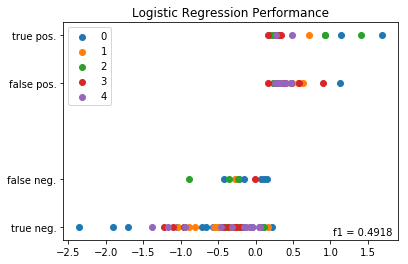

f1 of 0: 0.36363636363636365
f1 of 1: 0.4444444444444444
f1 of 2: 0.625
f1 of 3: 0.5333333333333333
f1 of 4: 0.4


In [12]:
#import modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score




cv= TimeSeriesSplit(n_splits=5,  max_train_size=None)

column = 'LR_labels'
column1 = 'DGS2_first_diff'

preds=[]
ys=[]
f1s=[]


#define X and y 
y = merged[column]
X= merged[column1]

#instantiate LogisticRegression model est1

est1 =LogisticRegression(class_weight = 'balanced', solver = 'lbfgs')

#iterate through each data split, i is iterateion number, tr are indexes for training data, tst are indexes for test data
for i, (tr,tst) in enumerate(cv.split(X,y)):


    #fit logistic regression model with predictions of est for training data
    est1.fit(X.iloc[tr].values.reshape(-1,1), y.iloc[tr].values.reshape(-1,1).ravel())
    
    
    #predict percentile with logistic regression
    y_pred = est1.predict(X.iloc[tst].values.reshape(-1,1))
    
    #calculate period f1 score: f1
    f1= f1_score(y.iloc[tst].values.reshape(-1,1),y_pred, average ='binary')
    
    #append predicted values, actual values and f1 scores to preds, ys and f1s
    preds.append(y_pred)
    ys.append(y.iloc[tst].values.reshape(-1,1))
    f1s.append(f1)
    
    #plot predictions
    #plt.scatter(y_pred1, (merged.percentiles.iloc[tst] + est1.predict(y_pred1))/2, label = i)
    plt.scatter(X.iloc[tst], (.25*y.iloc[tst] +.75*y_pred), label = i) 



npy = ys[0]
npyp =preds[0]

for i in range(1,len(ys)):
    npy=np.hstack((npy.ravel(), np.ravel(ys[i])))
    npyp = np.hstack((npyp.ravel(), np.ravel(preds[i])))

f1 = f1_score(npy,npyp, average ='binary')
    

#annotate plot with pearson r value, set y-ticks
plt.annotate(s= 'f1 = '+ str(f1)[0:6], xy = [270,5], xycoords = 'axes points')
plt.legend()
plt.yticks(ticks=[0,.25,.75,1], labels =['true neg.', 'false neg.','false pos.', 'true pos.'])
plt.title(label= 'Logistic Regression Performance')
plt.show()

#print f1 scores for each period individually
for i in range(len(f1s)):
    print('f1 of '+str(i)+": {}".format(str(f1s[i])))


<p>
In order to compare our results to what we might expect from pure randomness, lets simulate data. We’ll simulate data which randomly predicts a 1, 25% of the time and a 0, 75% if the time using a binomial distribution. These percentages are chosen since we have previously defined 1 to represent quarters in the top 25% of historic growth rates. Using <code>binomial</code> we create 1000 data series having the same length as our predictions. For each simulated data series we calculate a store the f1 score representing how well the random data set predicted the data. We then calculate the p-value or fraction of the simulated f1 scores that were greater than that observed. The output indicates that the p-value is about .001 and the average f1 score of binomial model is about .24 versus our observed f1 score of .49. Therefore, we conclude that the logistic regression model very likely gives us an edge in predicting good quarterly growth rates versus what we would expect if we were just guessing based on randomness.
</p>

In [13]:
#imports
from numpy.random import binomial

#create numpy array to store simulated f1 scores
f1_scores=np.empty(shape=1000)

# use for loop to simulate 1000 f1 scores using a binomial distribution
for i in range(1000):
    bs = binomial(n=1, p=.25, size=len(npy))
    f1_scores[i] = f1_score(npy, bs, average ='binary')

#calculate fraction of simulated f1 scores greater than that observed
p_val = sum(f1_scores>f1)/len(f1_scores)

#print results
print("fraction of simulated data that had f1_score greater than observed: {}".format(str(p_val)))
print("observed f1-score: {}".format(str(f1)))
print("average f1_score of simulations: {}".format(str(np.mean(f1_scores))))

fraction of simulated data that had f1_score greater than observed: 0.0
observed f1-score: 0.4918032786885245
average f1_score of simulations: 0.23686001658658049


<h1>The Original Question Revisited</h1>


<p>
Originally, this whole investigation was spawned by curiosity over the whether we should pay attention to media reports regarding bond yield inversions as a leading indicator for economic recession. In particular, the first plot of the blog shows the relationship between periods of economic recession and 10Y bond yields minus 2Y bond yields (T10Y2Y). This plot demonstrates a curious pattern, which is that periods of economic recession tend to occur in the period soon after the plot dips below zero which represents and inversion of 10Y and 2Y bond yields. After playing around with the data I was initially skeptical of the claims regarding the importance of bond yield <em>spreads</em> in economic forecasting, partly because the T10Y2Y didn’t perform any better in predicting real gdp than the DGS2. In other words, if it’s the <em>differences</em> between the yields of longer term bonds and shorter term bonds you might expect the 10Y minus 2Y (T10Y2Y) to be more informative in predicting real gdp than the 2Y (DGS2) alone. However, I found in predicting quarterly growth rate of real gdp that the T10Y2Y didn’t perform any better than the DGS2 and if anything performed slightly worse, which is why I focused on the DGS2 rather than the T10Y2Y in this demonstration.
</p>
<p>
However, while initially skeptical of the T10Y2Y I have had a change in opinion. To illustrate why I have changed my opinion I have plotted several sets of subplots below. Each set of subplot is a side to side comparison of  1) the DGS2 first difference plotted against the GDPC1 growth rate for a given resample period and 2) the T10Y2Y first difference plotted against  GDPC1 growth rate over the same resample period. The resample periods over which the data was aggregated are quarter, two quarter, year, 2 year and 3 year periods.  If we inspect the different aggregation periods we notice something interesting. If we look at the data aggregated quarterly both the DGS2 and the T10Y2Y have similar correlations, .4182 and -.401,albeit with opposite signs. Over 2 quarter periods the T10Y2Y performs better (-.535) than the DGS2 (.4557) although both still perform reasonably well. Over year periods, the performance of the DGS2 drops to .3505 while the performance of the T10Y2Y increases slightly to -.548. Over 2Y periods the performance of the DGS2 drops to .2667 while the performance of the T10Y2Y increases slightly to -.582 more than double in absolute value to that of the DGS2. Over 3Y periods the performance of the DGS2 drops further to .1643, while the performance of the T10Y2Y remains roughly the same at -.577. In other words, the correlation of the first difference of T10Y2Y with percent change of GDPC1 seems to improve and remain stable over longer periods of time than initially considered, while the same correlation of the DGS2 tends to decrease over longer periods of time. 
</p>
<p>
What this demonstrates is that the large scale movements of the T10Y2Y are more indicative of the overall performance of the economy than are those of the DGS2. I think the reason for this is probably because the the large scale movements of the DGS2 over longer periods of time are more dominated by movements in the Fed Fund rate than they are by changing economic conditions, whereas because the T10Y2Y is a difference between two bond yields that movements due to changing Fed Fund rate are differenced out, which is why the T10Y2Y is more stable about a mean than is the DGS2. 
</p>
<p>
The power of the T10Y2Y, therefore, lies in the moderate <em>negative correlation</em> between large scale movements in the T10Y2Y and the overall performance of the economy. For instance, if we expect the T10Y2Y to generally increase for the foreseeable future, then we can expect that the economy will generally perform weakly in the foreseeable future. Conversely, if expect the T10Y2Y to decrease for the foreseeable future then we can expect that the economy will generally perform well in the foreseeable future. One interesting aspect of the T10Y2Y is that in the past it has had well defined periods of general increase and general decrease over long periods of time. For instance, it has tended to have well defined peaks after which follow periods of general decrease over long periods of time and valleys after which follows periods of general increase over long periods of time. The fact that the T10Y2Y is somewhat predictable in its large-scale movements makes it a good indicator of whether we can expect periods of general economic expansion and general economic contraction in the foreseeable future. For instance, when the T10Y2Y inverts (dips below zero) this tends to indicate that it has reached near its minimum value and that it will soon begin a period of increase over a relatively long period of time. Because, periods of general increase are associated with periods of weak economic growth and recession, these inversion events can be considered leading indicators or recession. Likewise, after the T10Y2Y reaches a local maximum, we might surmise that a relatively long period of decrease will follow which will generally be associated with strong economic growth. Therefore, T10Y2Y local maximums can be considered leading indicators of periods of strong economic growth.
</p>

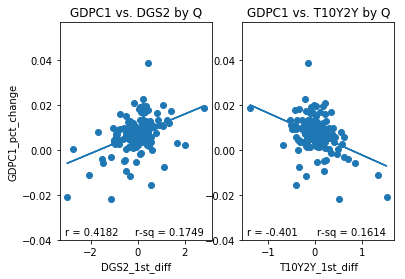

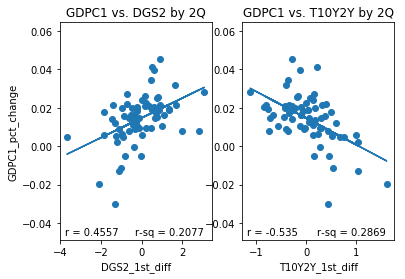

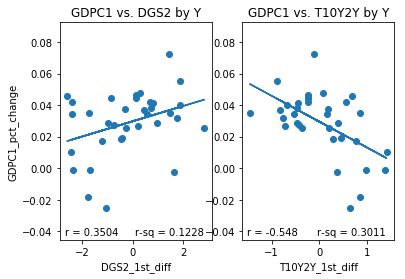

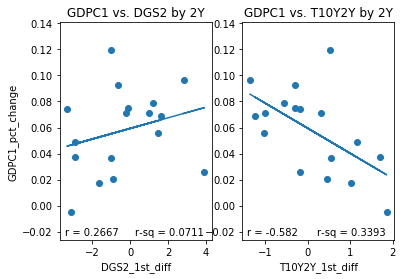

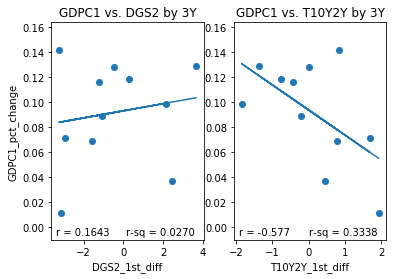

In [14]:

#define columns to use
column = 'GDPC1_pct_change'
column1 = 'DGS2_1st_diff'
column2 = 'T10Y2Y_1st_diff'

#create list to store timespans over which to resample data
spans = ['Q', '2Q', 'Y', '2Y', '3Y']


#use for loop to create subplots for each timespan
for i in range(len(spans)):
    
    #concatenate and resample data for the given timespan in spans
    merged = pd.concat([gdp, Two, T10Y2Y], axis =1).resample(spans[i], label = 'left').mean().loc[:'2009']  
    
    #create column for real gdp growth rate
    merged[column] = merged.GDPC1.pct_change()
    
    #create column to store firt difference of DGS2
    merged[column1] = merged.DGS2.diff()
    
    #create column to store the first difference of T10Y2Y
    merged[column2] = merged.T10Y2Y.diff()
    
    #drop rows with nan values
    merged = merged.dropna()

    #instantiate linear model   
    model = LinearRegression()
    
    #process data for fitting of linear model
    X = merged[column1].values.reshape(-1,1)
    X1 = merged[column2].values.reshape(-1,1)
    y = merged[column].values.reshape(-1,1)
    
    #fit linear model to DGS2_1st_diff vs. GDPC1_pct_change
    model.fit(X, y)

    #calculate trend line and correlation coefficient for the data
    trend = model.predict(X)
    r= pearsonr(X, y)[0][0]
    
    #fit linear model to T10Y2Y_1st_diff vs. GDPC1_pct_change
    model.fit(X1, y)
    trend1 = model.predict(X1)
    r1= pearsonr(X1,y)[0][0]
    

    #create subplot plot of DGS2_1st_diff vs. GDPC1_pct_change
    p1 = plt.subplot(1,2,1)
    plt.scatter(X, y)
    plt.plot(X, trend)
    plt.xlabel(column1)
    plt.ylabel(column)
    plt.annotate(s= 'r = '+ str(r)[0:6], xy = [5,5], xycoords = 'axes points')
    plt.annotate(s= 'r-sq = '+ str(r**2)[0:6], xy = [75, 5], xycoords = 'axes points')
    plt.title('GDPC1 vs. DGS2 by {}'.format(spans[i]))
    
    #create subplot plot of T10Y2Y_1st_diff vs. GDPC1_pct_change
    p2= plt.subplot(122, sharey=p1)
    plt.scatter(X1, y)
    plt.plot(X1, trend1)
    plt.xlabel(column2)
    plt.annotate(s= 'r = '+ str(r1)[0:6], xy = [5,5], xycoords = 'axes points')
    plt.annotate(s= 'r-sq = '+ str(r1**2)[0:6], xy = [75,5], xycoords = 'axes points')
    plt.title('GDPC1 vs. T10Y2Y by {}'.format(spans[i]))
    plt.show()

    

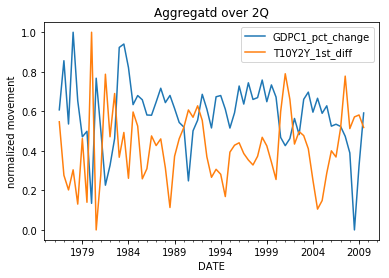

In [15]:
column = 'GDPC1_pct_change'
column1 = 'T10Y2Y_1st_diff'
rule ='2Q'

merged = pd.concat([gdp, T10Y2Y], axis =1).resample(rule =rule, label = 'left').mean().loc[:'2009']  
merged[column] = merged.GDPC1.pct_change()
merged[column1] = merged.T10Y2Y.diff()
merged = merged.dropna()

merged[column] = (merged[column] -merged[column].min())/(merged[column].max()- merged[column].min())
merged[column1]= (merged[column1]- merged[column1].min())/(merged[column1].max()- merged[column1].min())
merged[column].plot()
merged[column1].plot()
plt.ylabel('normalized movement')
plt.title('Aggregatd over {}'.format(rule))

plt.legend()
plt.show()

<h2>How confident can we be in this relationship?</h2>


<p>
We can answer this question by performing substantially the same analysis as we performed earlier only using the first difference of the T10Y2Y aggregated over 2 quarter periods compared with percent change of GDPC1 aggregated over the same time periods. The steps are as follows: 1) aggregate the data over the chosen time period, 2) check to determine stationarity using adf and kpss tests, 3) fit AR models to the data using BIC, 4) Use the AR models to iteratively and randomly simulate data having similar AR properties to our data, and 5) calculate the probability of observing a more extreme correlation to that actually observed. I’ve provided the abridged version below. As can be seen from the output, the probability of observing a more extreme correlation to that observed based on the autoregressive properties of the two time-series alone is pretty small, somewhere between 0 and 1/10000. Therefore, we can be confident that the observed correlation between the first difference of T10Y2Y aggregated over 2Q periods and percent of GDPC1 over the same time periods is real and unlikely to be spurious.
</p>

In [16]:

#define columns to use
column = 'GDPC1_pct_change'
column1 = 'T10Y2Y_first_diff'


#concatenate and resample data for the given timespan in spans
merged = pd.concat([gdp,  T10Y2Y], axis =1).resample('2Q', label = 'left').mean().loc[:'2009']  

#create column for real gdp growth rate
merged[column] = merged.GDPC1.pct_change()


#create column to store the first difference of T10Y2Y
merged[column1] = merged.T10Y2Y.diff()

#drop rows with nan values
merged = merged.dropna()


#create ARMA models
X=merged[column].dropna().resample('2Q').mean()
X1=merged[column1].dropna().resample('2Q').mean()
mod = ARMA(X, order = (6,0))
results =mod.fit()
mod = ARMA(X1, order = (1,0))
results1 =mod.fit()

#create ARMA process objects for simulating data
AR_object = ArmaProcess().from_estimation(results)
AR_object1 = ArmaProcess().from_estimation(results1)

#create empty arrays for storing r-squared values
rs =np.empty(10000)
rg = np.empty(10000)
rt= np.empty(10000)

#cacualte observed r
r_obs = pearsonr(X, X1)[0]

#simulate 1000 series with similar autoregressive properties to actual data
for i in range(10000):
    
    simulated_data = AR_object.generate_sample(nsample= len(X))
    simulated_data1 = AR_object1.generate_sample(nsample= len(X))
    
    r=pearsonr(simulated_data, simulated_data1)[0]
    rs[i] = r**2

    r =pearsonr(X, simulated_data1)[0]
    rg[i] = r**2
    
    r1 =pearsonr(X1, simulated_data)[0]
    rt[i] = r1**2
    
#calculate p-values for r-squared values greater than observed value    
p = np.sum(rs >=r_obs**2)/len(rs)
pg = np.sum(rg >=r_obs**2)/len(rg)
pt = np.sum(rt >=r_obs**2)/len(rt)
print('p-value of simulated data series having higher correlation than observed: {}'.format(str(p)))
print('p-value of simulated gdp vs real T10Y2Y havign higher correlation than observed: {}'.format(str(pg)))
print('p-value of simulated T10Y2Y vs real GDPC1 having higher correlation than observed: {}'.format(str(pt)))

/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

p-value of simulated data series having higher correlation than observed: 0.0
p-value of simulated gdp vs real T10Y2Y havign higher correlation than observed: 0.0
p-value of simulated T10Y2Y vs real GDPC1 having higher correlation than observed: 0.0002


<h1>Conclusion </h1>


<p>
In this demonstration, we investigated the question of whether there is any relationship between bond yields and real gdp. This question was sparked by practical concerns over media reports regarding bond yield inversions as a leading indicator of recession. 
</p>
<p>
We started by showing a positive correlation between the second difference of the DGS2 aggregated quarterly and the first difference of quarterly growth rate of GDPC1. We demonstrated that this relationship was unlikely to be spurious and that by training a linear model to predict <em>differences</em> in quarterly we could predict quarterly growth rate by adding our predictions to lags of quarterly growth rate. We also demonstrated that DGS2 provided predictive power since it improved predictions over a model which predicted quarterly growth rate based on lags of quarterly growth rate alone. We also trained a logistic regression model using the first difference in DGS2 aggregated quarterly to predicted whether a quarter’s growth rate would be in the top 25% of historic quarterly growth rates. We demonstrated that DGS2 provided predictive power since it improved predictions over a model which made predictions based on randomness alone. Finally, we returned to the original question. We demonstrated a moderate correlations between first differences in the T10Y2Y aggregated over periods of 2Q-3Y and percent change of GDPC1 aggregated over the same time periods. We also demonstrated using data aggregated over a 2Q period that this relationship was unlikely to be spurious. Therefore, we concluded that there is validity to concerns over bond yield inversions assuming that inversion event are followed by a period of general increase in the T10Y2Y, whose large-scale differences over long periods are negatively correlated with real gdp growth rates over the same periods.
</p>
<p>
In a nutshell, yes there is a relationship between bond yields and real gdp,  and this relationship can be exploited to add predictive power to models of real gdp. At the same time, the relationship between bond yields and real gdp is weak to moderate at best. Therefore, while we can be confident that the relationship is real we should keep in mind that bond yields can’t tell us everything about the performance of the economy. In a real world scenario, we probably want to improve our model’s performance by considering other types of data in conjunction with bond yields. Maybe, we will return to this topic in the future and try to improve our ability to predict real gdp growth rates by considering other types of data in conjunction with bond yields. 
</p>
<p>If you enjoyed this analysis check out my blog at <a>https://www.notnormalblog.com</a> </p>